In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from aps_ai.beamline34IDC.simulation.facade.focusing_optics_interface import Movement

from aps_ai.beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution,\
    load_shadow_beam, PreProcessorFiles, EmptyBeamException
from aps_ai.beamline34IDC.optimization import movers, configs, display_utils, common as opt_common
from aps_ai.beamline34IDC.optimization.scipy_nelder_mead import ScipyOptimizer
from aps_ai.beamline34IDC.optimization.skopt_gp import SkoptGaussianProcessOptimizer, SkoptDiscreteGPOptimizer
import beamline34IDC.optimization.movers as movers

from aps_ai.beamline34IDC.optimization.display_utils import LivePlotCallback
from aps_ai.beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
import shutil
import glob
import IPython
from skopt.callbacks import DeltaXStopper, DeltaYStopper, DeadlineStopper

In [3]:
%matplotlib inline

In [4]:
DEFAULT_RANDOM_SEED = np.random.randint(100000)
print(DEFAULT_RANDOM_SEED)

86402


In [5]:
base_dir = '/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/'
orig_work_dir = f'{base_dir}/work_directory'
temp_work_dir = f'{base_dir}/tmp_work_dir_{DEFAULT_RANDOM_SEED}'

In [6]:
os.mkdir(temp_work_dir)

In [7]:
dat_files = glob.glob(f'{orig_work_dir}/*.dat') + glob.glob(f'{orig_work_dir}/*.ini')
for df in dat_files:
    shutil.copy(df, temp_work_dir)

In [8]:
os.chdir(temp_work_dir)

In [9]:
input_beam_path = "primary_optics_system_beam.dat"

In [10]:
move_motors = ['hkb_4']

In [11]:
motors_str = move_motors[0] if len(move_motors) == 1 else '_'.join(move_motors)
fig_save_path = f'{orig_work_dir}/figures/{motors_str}/'
if not os.path.isdir(fig_save_path):
    os.mkdir(fig_save_path)

In [16]:
# Focusing Optics System -------------------------
focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path, bender=True)

In [17]:
initial_absolute_positions = np.array(movers.get_absolute_positions(focusing_system, move_motors))
print(initial_absolute_positions)

[0.]


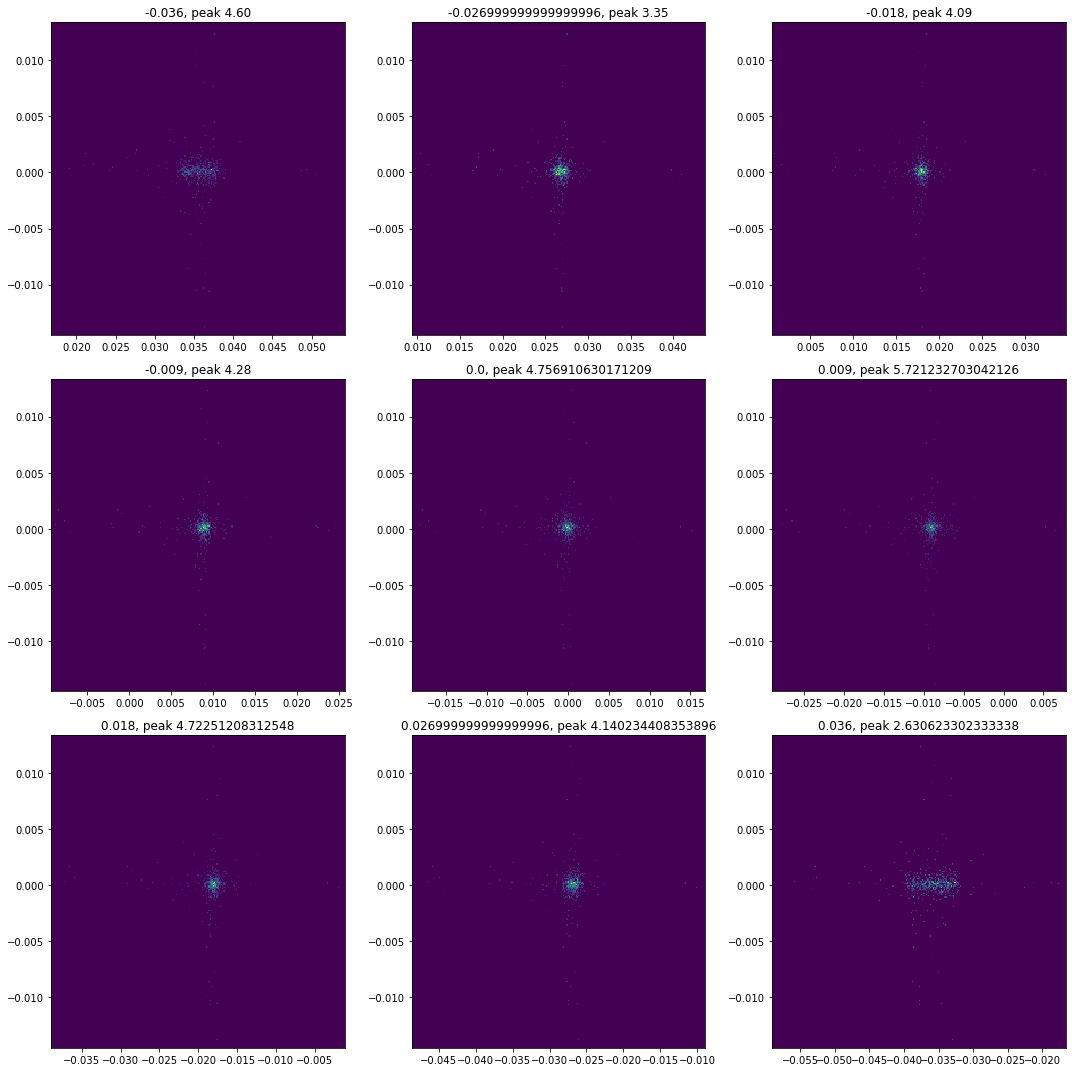

In [14]:
fig, axs = plt.subplots(3, 3, figsize=[15, 15])
axs = axs.flatten()

m = 0.009

for i in range(5):
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         translations=initial_absolute_positions + m * i, 
                                         movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    axs[4 + i].pcolormesh(hist.hh, hist.vv, hist.data_2D)
    pk = dw.get_parameter('peak_intensity')
    axs[4 + i].set_title(f'{m * i}, peak {pk}')
    
    if i == 0: continue
    
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         translations=initial_absolute_positions - m * i, 
                                         movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    axs[4 - i].pcolormesh(hist.hh, hist.vv, hist.data_2D)
    
    pk = dw.get_parameter('peak_intensity')
    axs[4 - i].set_title(f'{-m * i}, peak {pk:2.2f}')
plt.tight_layout()
    
    

  0%|          | 0/5 [00:00<?, ?it/s]

Initial motor positions are [-0.0293518]
Initial loss is 0.030645974905509677
motors ['hkb_4'] trans [-0.02887818] current loss 20000.0


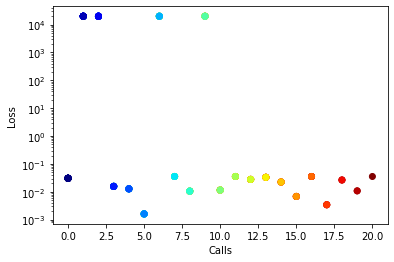

motors ['hkb_4'] trans [-0.02120723] current loss 20000.0
motors ['hkb_4'] trans [0.01406056] current loss 0.015682309425379768
motors ['hkb_4'] trans [0.01691912] current loss 0.012825682249340406
motors ['hkb_4'] trans [0.02892716] current loss 0.0016129791545936249
motors ['hkb_4'] trans [-0.04916598] current loss 20000.0
motors ['hkb_4'] trans [-0.00400544] current loss 0.03556537360749876
motors ['hkb_4'] trans [0.03765218] current loss 0.010577820791476832
motors ['hkb_4'] trans [-0.03623004] current loss 20000.0
motors ['hkb_4'] trans [0.03901195] current loss 0.011563569788215813
motors ['hkb_4'] trans [-0.00351654] current loss 0.03556537360749876
motors ['hkb_4'] trans [0.00226807] current loss 0.027935573670205896
motors ['hkb_4'] trans [-0.00135348] current loss 0.033197114007315294
motors ['hkb_4'] trans [0.00759632] current loss 0.022508410107232858
motors ['hkb_4'] trans [0.02370094] current loss 0.006839790211854181
motors ['hkb_4'] trans [-0.00286531] current loss 0.03

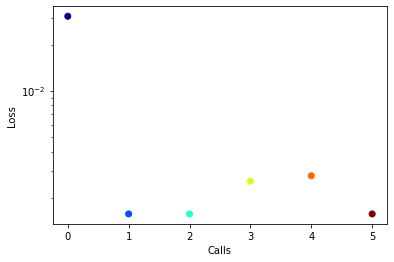

[ final_simplex: (array([[0.02892716],
       [0.02928875]]), array([0.00156522, 0.00156522]))
           fun: 0.0015652197355609109
       message: 'Optimization terminated successfully.'
          nfev: 4
           nit: 2
        status: 0
       success: True
             x: array([0.02892716])]


 20%|██        | 1/5 [00:22<01:29, 22.39s/it]

Test 0 success True
Initial motor positions are [-0.02122323]
Initial loss is 0.021676491875152037
motors ['hkb_4'] trans [0.01867488] current loss 0.002835443331157893


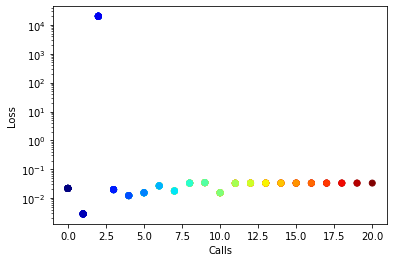

motors ['hkb_4'] trans [-0.03888511] current loss 20000.0
motors ['hkb_4'] trans [0.0016166] current loss 0.01969551810935581
motors ['hkb_4'] trans [0.03201896] current loss 0.012221347943033995
motors ['hkb_4'] trans [0.03463867] current loss 0.015356432500116002
motors ['hkb_4'] trans [-0.0054688] current loss 0.02661034470640429
motors ['hkb_4'] trans [0.00305362] current loss 0.01768490614479957
motors ['hkb_4'] trans [-0.01114136] current loss 0.033197114007315294
motors ['hkb_4'] trans [-0.01189119] current loss 0.03437820883086768
motors ['hkb_4'] trans [0.03361289] current loss 0.015356432500115999
motors ['hkb_4'] trans [0.05] current loss 0.032789661441492014
motors ['hkb_4'] trans [-0.01061119] current loss 0.033197114007315294
motors ['hkb_4'] trans [-0.0106817] current loss 0.033197114007315294
motors ['hkb_4'] trans [-0.01071359] current loss 0.033197114007315294
motors ['hkb_4'] trans [-0.01073766] current loss 0.033197114007315294
motors ['hkb_4'] trans [-0.01075154] c

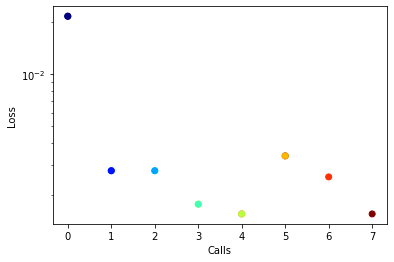

[ final_simplex: (array([[0.02054236],
       [0.02030893]]), array([0.00156522, 0.00156522]))
           fun: 0.0015652197355609109
       message: 'Optimization terminated successfully.'
          nfev: 6
           nit: 3
        status: 0
       success: True
             x: array([0.02054236])]


 40%|████      | 2/5 [00:47<01:12, 24.22s/it]

Test 1 success True
Initial motor positions are [-0.02312478]
Initial loss is 0.023490372533620504
motors ['hkb_4'] trans [-0.00526593] current loss 0.02946942909313032


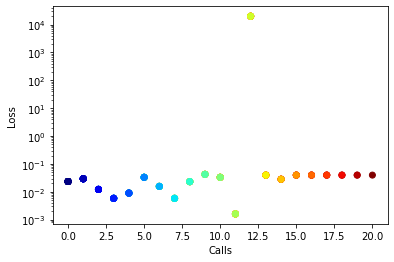

motors ['hkb_4'] trans [0.03390897] current loss 0.012221347943033995
motors ['hkb_4'] trans [0.01803767] current loss 0.005840607081511303
motors ['hkb_4'] trans [0.01506125] current loss 0.009013649378655064
motors ['hkb_4'] trans [-0.007901] current loss 0.033197114007315294
motors ['hkb_4'] trans [0.0081416] current loss 0.015682309425379768
motors ['hkb_4'] trans [0.01799168] current loss 0.005840607081511303
motors ['hkb_4'] trans [0.04544789] current loss 0.023166213166379204
motors ['hkb_4'] trans [-0.01478842] current loss 0.04236594367520793
motors ['hkb_4'] trans [-0.00779532] current loss 0.033197114007315294
motors ['hkb_4'] trans [0.02297283] current loss 0.0016129791545936249
motors ['hkb_4'] trans [-0.05] current loss 20000.0
motors ['hkb_4'] trans [-0.01288167] current loss 0.03985633347985813
motors ['hkb_4'] trans [0.05] current loss 0.028358631743973618
motors ['hkb_4'] trans [-0.01288992] current loss 0.03985633347985813
motors ['hkb_4'] trans [-0.01288313] current

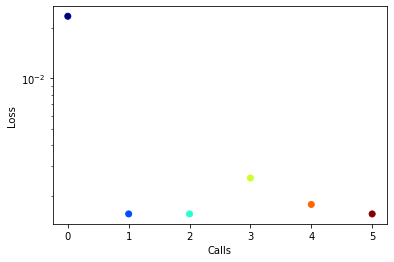

[ final_simplex: (array([[0.02297283],
       [0.02268567]]), array([0.00156522, 0.00156522]))
           fun: 0.0015652197355609109
       message: 'Optimization terminated successfully.'
          nfev: 4
           nit: 2
        status: 0
       success: True
             x: array([0.02297283])]


 60%|██████    | 3/5 [01:10<00:47, 23.63s/it]

Test 2 success True
Initial motor positions are [0.0215438]
Initial loss is 0.023166213166379197
motors ['hkb_4'] trans [-0.01029398] current loss 0.013370759723547712


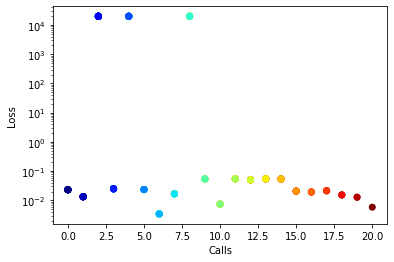

motors ['hkb_4'] trans [0.04528915] current loss 20000.0
motors ['hkb_4'] trans [0.00117216] current loss 0.024930085323719067
motors ['hkb_4'] trans [0.03951088] current loss 20000.0
motors ['hkb_4'] trans [-0.04514597] current loss 0.023490372533620504
motors ['hkb_4'] trans [-0.01967722] current loss 0.0034374662698662684
motors ['hkb_4'] trans [-0.03722821] current loss 0.01668721903348073
motors ['hkb_4'] trans [0.0359755] current loss 20000.0
motors ['hkb_4'] trans [0.02637362] current loss 0.05402004781097718
motors ['hkb_4'] trans [-0.01510985] current loss 0.007411711203388379
motors ['hkb_4'] trans [0.02297287] current loss 0.054605036346848185
motors ['hkb_4'] trans [0.02009025] current loss 0.05041158674245927
motors ['hkb_4'] trans [0.02279959] current loss 0.054605036346848185
motors ['hkb_4'] trans [0.02609596] current loss 0.05402004781097718
motors ['hkb_4'] trans [-0.04137362] current loss 0.020691864187305512
motors ['hkb_4'] trans [-0.00324594] current loss 0.019347

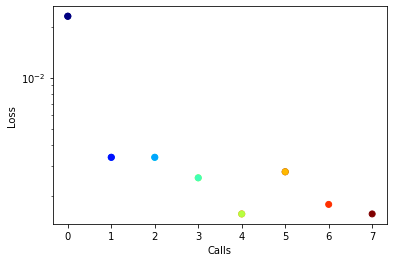

[ final_simplex: (array([[-0.02164495],
       [-0.02189091]]), array([0.00156522, 0.00156522]))
           fun: 0.0015652197355609109
       message: 'Optimization terminated successfully.'
          nfev: 6
           nit: 3
        status: 0
       success: True
             x: array([-0.02164495])]


 80%|████████  | 4/5 [01:33<00:23, 23.45s/it]

Test 3 success True
Initial motor positions are [-0.00815199]
Initial loss is 0.009013401124008757
motors ['hkb_4'] trans [-0.00098781] current loss 0.009832163376356598


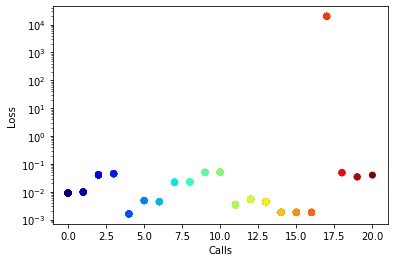

motors ['hkb_4'] trans [0.04343677] current loss 0.04048140285902058
motors ['hkb_4'] trans [-0.03159953] current loss 0.04473617864152042
motors ['hkb_4'] trans [0.0085132] current loss 0.0016129791545936249
motors ['hkb_4'] trans [0.00419305] current loss 0.004840553064621455
motors ['hkb_4'] trans [0.01088643] current loss 0.00443491034045865
motors ['hkb_4'] trans [0.02869643] current loss 0.02218888705042065
motors ['hkb_4'] trans [-0.01470469] current loss 0.022508410107232858
motors ['hkb_4'] trans [-0.03691406] current loss 0.04986784681676643
motors ['hkb_4'] trans [0.04784109] current loss 0.05041158674245927
motors ['hkb_4'] trans [0.00888871] current loss 0.0034374662698662684
motors ['hkb_4'] trans [0.01114249] current loss 0.005421125594658463
motors ['hkb_4'] trans [0.01063998] current loss 0.00443491034045865
motors ['hkb_4'] trans [0.00667629] current loss 0.0018393135374696376
motors ['hkb_4'] trans [0.00705869] current loss 0.0018393135374696376
motors ['hkb_4'] tran

100%|██████████| 5/5 [01:53<00:00, 22.74s/it]

Test 4 success True


In [64]:
N_RUNS = 5

initial_centroids = []
initial_out_beams = []
absolute_movements = []

start_guesses = []
overall_successes = []
final_centroids = []
final_out_beams = []

min_trans = -0.05
max_trans = 0.05

for outer in tqdm(range(N_RUNS)):
    focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path, bender=True)
    translations = np.random.uniform(-0.03, 0.03, size=1)
    test_absolute_movements = initial_absolute_positions + translations
    print("Initial motor positions are", test_absolute_movements)
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
    centroid, out_beam, hist, dw = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    #plot_shadow_beam_spatial_distribution(out_beam)
    
    
    absolute_movements.append(test_absolute_movements)
    initial_centroids.append(centroid)
    initial_out_beams.append(out_beam)


    #opt_trial = SkoptDiscreteGPOptimizer(focusing_system, 
    #                                     motor_types=move_motors, 
    #                                     random_seed=DEFAULT_RANDOM_SEED, 
    #                                     loss_parameters=['centroid', 'fwhm'],
    #                                     loss_min_value=1e-3,
    #                                     use_gaussian_fit=True, 
    #                                     camera_xrange=[-5e-3, 5e-3], 
    #                                     camera_yrange=[-5e-3, 5e-3],
    #                                     camera_nbins=256)
    
    opt_trial = SkoptGaussianProcessOptimizer(focusing_system, 
                                              motor_types=move_motors, 
                                              random_seed=DEFAULT_RANDOM_SEED, 
                                              loss_parameters=['centroid', 'fwhm'],
                                              loss_min_value=1e-6,
                                              camera_xrange=[-5e-2, 5e-2],
                                              camera_yrange=[-5e-2, 5e-2],
                                              camera_nbins=512,
                                              use_gaussian_fit=False)
    #deltax_callback = DeltaXStopper(configs.DEFAULT_MOTOR_TOLERANCES['hkb_4'] / configs.DEFAULT_MOTOR_RESOLUTIONS['hkb_4'])
    #deltay_callback = DeltaYStopper(configs.DEFAULT_LOSS_TOLERANCES['centroid'])
    plot_callback = display_utils.LivePlotCallback(opt_trial)
    opt_trial.set_optimizer_options(callback = [plot_callback.call], xi=5e-4, kappa=0.1, n_calls=20, bounds=[-0.05, 0.05])
    opt_results, guesses, solution, success = opt_trial.trials(verbose=True)
    print("Solution is", solution)
    focusing_system = opt_trial.focusing_system
    plot_callback.close()
    
    if not success:
        print('Trying Nelder-Mead from minimum position')
        focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
        opt_trial = ScipyOptimizer(focusing_system, 
                                   motor_types=move_motors, 
                                   random_seed=DEFAULT_RANDOM_SEED, 
                                   loss_parameters=['centroid', 'fwhm'],
                                   loss_min_value=1e-6,
                                   use_gaussian_fit=False,
                                   camera_xrange=[-5e-2, 5e-2],
                                   camera_yrange=[-5e-2, 1e-2],
                                   camera_nbins=512)
        plot_callback = display_utils.LivePlotCallback(opt_trial)
        opt_trial.set_optimizer_options(callback = plot_callback.call)
        opt_results, guesses, solution, success = opt_trial.trials(1, initial_guess=solution[0],
                                                                   verbose=False, accept_all_solutions=True)
        focusing_system = opt_trial.focusing_system
        plot_callback.close()
        print(opt_results)
    start_guesses.append(guesses)
    overall_successes.append(success)
    centroid, out_beam, *_ = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    final_centroids.append(centroid)
    final_out_beams.append(out_beam)
    print(f'Test {outer} success {success}')

In [65]:
initial_hists_dws = [get_shadow_beam_spatial_distribution(ob)#, xrange=[-5e-2, 5e-2],yrange=[-5e-2,5e-2], nbins=512) 
                     for ob in initial_out_beams]
initial_hists, initial_dws = zip(*initial_hists_dws)

In [66]:
initial_peaks = [dw.get_parameter('peak_intensity') for dw in initial_dws]
initial_h_fwhms = [dw.get_parameter('h_fwhm') for dw in initial_dws]
initial_v_fwhms = [dw.get_parameter('v_fwhm') for dw in initial_dws]

In [67]:
final_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in final_out_beams]
final_hists, final_dws = zip(*final_hists_dws)

In [68]:
final_peaks = [dw.get_parameter('peak_intensity') for dw in final_dws]
final_h_fwhms = [dw.get_parameter('h_fwhm') for dw in final_dws]
final_v_fwhms = [dw.get_parameter('v_fwhm') for dw in final_dws]

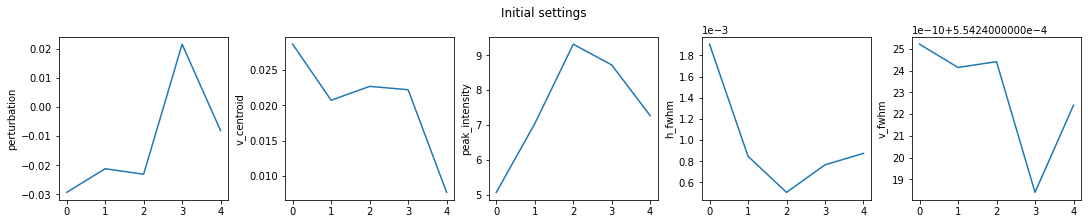

In [69]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes[0].plot(absolute_movements)
axes[0].set_ylabel('perturbation')

axes[1].plot(initial_centroids)
axes[1].set_ylabel('v_centroid')

axes[2].plot(initial_peaks)
axes[2].set_ylabel('peak_intensity')

axes[3].plot(initial_h_fwhms)
axes[3].set_ylabel('h_fwhm')
axes[3].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[4].plot(initial_v_fwhms)
axes[4].set_ylabel('v_fwhm')
axes[4].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('Initial settings')
fig.savefig(f'{fig_save_path}/initial_metrics.png', bbox_inches='tight')

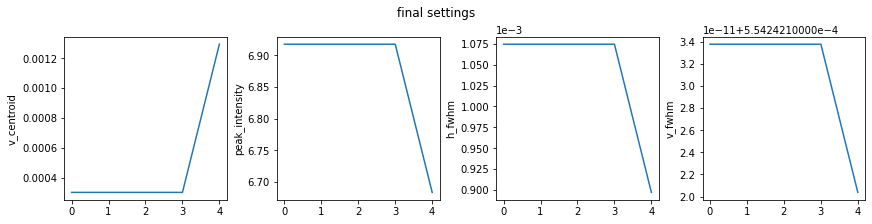

In [70]:
fig, axes = plt.subplots(1, 4, figsize=[12,3], constrained_layout=True)

axes[0].plot(final_centroids)
axes[0].set_ylabel('v_centroid')

axes[1].plot(final_peaks)
axes[1].set_ylabel('peak_intensity')

axes[2].plot(final_h_fwhms)
axes[2].set_ylabel('h_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[3].plot(final_v_fwhms)
axes[3].set_ylabel('v_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('final settings')
fig.savefig(f'{fig_save_path}/final_metrics.png', bbox_inches='tight')

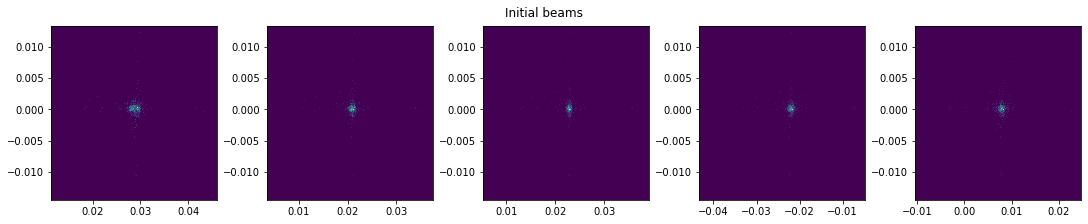

In [71]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(initial_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Initial beams')
fig.savefig(f'{fig_save_path}/initial_beams.png', bbox_inches='tight')

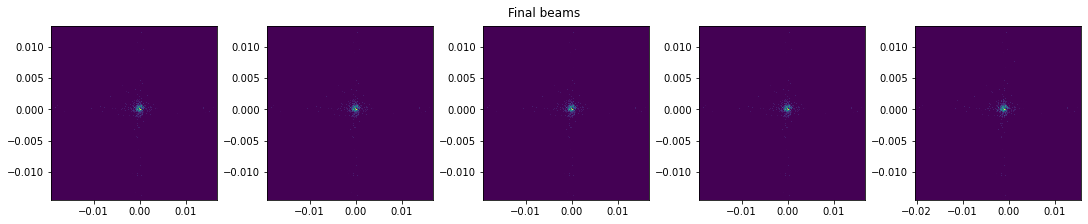

In [72]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(final_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Final beams')
fig.savefig(f'{fig_save_path}/final_beams.png', bbox_inches='tight')